# Lets grow more

## Task -2 Beginner level task: Stock Market Prediction And Forecasting Using Stacked LSTM

## Data set link:
## https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

## Importing packages

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [95]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [96]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [97]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [98]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [99]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [119]:
df.shape

(2035, 9)

In [100]:
# converting string datetime objects to python date time objects

df['Date'] = pd.to_datetime(df['Date']) 

In [101]:
d=df.sort_values(by='Date',ascending=True,kind="mergesort")
d

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [106]:
d.reset_index(inplace=True)

# Visualizing the data

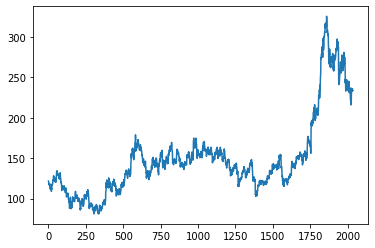

In [107]:
plt.plot(d['Close'])
plt.show()

In [115]:
d_close=d['Close']
d_close.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

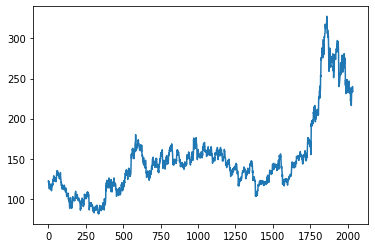

In [109]:
plt.plot(d['Open'])
plt.show()

In [117]:
d_open=d['Open']
d_open.head()


0    122.1
1    120.3
2    121.8
3    120.1
4    117.6
Name: Open, dtype: float64

In [120]:
# using minmaxscaler to scale the attributes

scaler=MinMaxScaler(feature_range=(0,1))


In [126]:
d_close=scaler.fit_transform(np.array(d_close).reshape(-1,1))
d_close

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

## Spliting the data into training and testing data

In [128]:
training_size = int(len(d_close)*0.70)   # 70% is training data
test_size = len(d_close) - training_size
train, test = d_close[0: training_size,:], d_close[training_size : len(d_close),:1]

In [130]:
training_size,test_size

(1424, 611)

In [132]:
train,test

(array([[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.15012255],
        [0.15747549],
        [0.15277778]]),
 array([[0.1621732 ],
        [0.15951797],
        [0.16707516],
        [0.15992647],
        [0.16053922],
        [0.16441993],
        [0.16687092],
        [0.1693219 ],
        [0.16074346],
        [0.15972222],
        [0.16401144],
        [0.15727124],
        [0.14705882],
        [0.14460784],
        [0.15175654],
        [0.15441176],
        [0.15216503],
        [0.14848856],
        [0.15522876],
        [0.15767974],
        [0.1621732 ],
        [0.16094771],
        [0.16339869],
        [0.15931373],
        [0.15972222],
        [0.16115196],
        [0.16666667],
        [0.15747549],
        [0.15379902],
        [0.14848856],
        [0.15114379],
        [0.1503268 ],
        [0.15155229],
        [0.15645425],
        [0.16033497],
        [0.1566585 ],
        [0.15686275],
        [0.17749183],
        [0.179738

In [137]:
# Converting the array values previously calculated into a matrix

def mat(ds, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [139]:
time_step = 100
x_train, y_train = mat(train, time_step)
x_test, y_test = mat(test, time_step)

In [140]:
x_train.shape

(1323, 100)

In [142]:
y_train.shape

(1323,)

In [143]:
x_test.shape

(510, 100)

In [144]:
y_test.shape

(510,)

In [170]:
# reshaping x_train into 3-D which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_train.shape

(1323, 100, 1)

In [171]:
# reshaping x_test into 3-D
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_test.shape

(510, 100, 1)

## Creating the stacked LSTM Model

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [173]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [174]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.fit(x_train, y_train, validation_split=0.1, epochs= 60, batch_size=64, verbose = 1)


Epoch 1/60
19/19 [==============================] - 18s 409ms/step - loss: 0.0128 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 5s 268ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 3/60
19/19 [==============================] - 5s 257ms/step - loss: 9.9883e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 228ms/step - loss: 8.7012e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 202ms/step - loss: 8.5835e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 200ms/step - loss: 8.3551e-04 - val_loss: 0.0012
Epoch 7/60
19/19 [==============================] - 4s 213ms/step - loss: 8.5123e-04 - val_loss: 0.0012
Epoch 8/60
19/19 [==============================] - 5s 240ms/step - loss: 8.1305e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 4s 235ms/step - loss: 7.5108e-04 - val_loss: 9.6171e-04
Epoch 10/60
19/19 [==============================] - 4s 216ms/step 

## Predicting the  model

In [209]:
train_predictions=model.predict(x_train)
test_predictions = model.predict(x_test)

16/16 [==============================] - 1s 45ms/step


In [215]:
# performing inverse transform on predictions

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [216]:
train_predictions,test_predictions

(array([[0.13774605],
        [0.13158636],
        [0.12865101],
        ...,
        [0.15990862],
        [0.15679544],
        [0.15432692]], dtype=float32),
 array([[0.2494539 ],
        [0.2502186 ],
        [0.2464175 ],
        [0.23531844],
        [0.22868684],
        [0.22670591],
        [0.23179018],
        [0.23835784],
        [0.23987131],
        [0.23825727],
        [0.23725206],
        [0.24222662],
        [0.24540946],
        [0.25181976],
        [0.260789  ],
        [0.25194678],
        [0.2418197 ],
        [0.24051377],
        [0.24328561],
        [0.2643955 ],
        [0.2825022 ],
        [0.29086068],
        [0.2917061 ],
        [0.28264368],
        [0.28190124],
        [0.28093144],
        [0.28258115],
        [0.2896252 ],
        [0.29242286],
        [0.2921806 ],
        [0.29372168],
        [0.28865933],
        [0.27499858],
        [0.2514911 ],
        [0.23800576],
        [0.23454422],
        [0.23557025],
        [0.23241939],
  

In [217]:
# calculate the RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error


In [218]:
# Train data RMSE
math.sqrt(mean_squared_error(y_train, train_predictions))
# print("The Mean Squared Error for above model is: ", mse)

0.013593007870137388

In [220]:
# Test data RSME
rmse=math.sqrt(mean_squared_error(y_test, test_predictions))
print("The Mean Squared Error for above model is: ", rmse)

The Mean Squared Error for above model is:  0.05381548590712629
